In [22]:
import numpy as np
import matplotlib.pyplot as plt

M = 100
N = 50
bet = 0.04
x0 = np.random.rand(N, 1)
tol = 1e-5


In [24]:

import time

def Alg1(x0, bet, tol, M, N):
    xx = x0
    vn = x0
    tht = 0.9
    iter = 1
    kap = iter / (iter + 10)
    A = np.random.rand(M, N)
    b = np.random.rand(M, 1)
    mu = 1e-3
    epsilon = 0.5
    err = [1]
    max_iter = 1000

    start_time = time.time()
    while err[-1] > tol and iter <= max_iter:
        un = 1 / (1 + tht) * xx + tht / (1 + tht) * vn
        yn = prox_f(un, bet, A, b)
        zn = prox_g(2 * yn - un + bet * grad_h(yn, mu, epsilon), mu, epsilon, bet)
        xxn = un + kap * (zn - yn)
        vvn = 1 / (1 + tht) * xxn + tht / (1 + tht) * vn
        err.append(np.linalg.norm(xx - xxn) / max(1, np.linalg.norm(xx)))

        iter += 1
        xx = xxn
        vn = vvn

    end_time = time.time()
    time_taken = end_time - start_time

    return err[1:], time_taken, iter - 1

def Alg2(x0, bet, tol, M, N):
    xx = x0
    vn = x0
    #tht = 0.9
    iter = 1
    kap = iter / (iter + 10)
    alpha = 1/(iter + 1)
    A = np.random.rand(M, N)
    b = np.random.rand(M, 1)
    mu = 1e-3
    epsilon = 0.5
    err = [1]
    max_iter = 1000

    start_time = time.time()
    while err[-1] > tol and iter <= max_iter:
        un = (1-alpha) * xx +  alpha * vn
        yn = prox_f(un, bet, A, b)
        zn = prox_g(2 * yn - un + bet * grad_h(yn, mu, epsilon), mu, epsilon, bet)
        xxn = un + kap * (zn - yn)
        vvn = (1-alpha) * vn +  alpha * xx
        err.append(np.linalg.norm(xx - xxn) / max(1, np.linalg.norm(xx)))

        iter += 1
        xx = xxn
        vn = vvn

    end_time = time.time()
    time_taken = end_time - start_time

    return err[1:], time_taken, iter - 1

def DCA(x0, bet, tol, M, N):
    xx = x0
    vn = x0
    #tht = 0.9
    iter = 1
    kap = iter / (iter + 10)**1.5
    alpha = iter/(iter + 1)
    A = np.random.rand(M, N)
    b = np.random.rand(M, 1)
    mu = 1e-3
    epsilon = 0.5
    err = [1]
    max_iter = 1000

    start_time = time.time()
    while err[-1] > tol and iter <= max_iter:
        #un = (1-alpha) * xx +  alpha * vn
        yn = prox_f(xx, bet, A, b)
        zn = prox_g(2 * yn - xx + bet * grad_h(yn, mu, epsilon), mu, epsilon, bet)
        xxn = xx + kap * (zn - yn)
        #vvn = (1-alpha) * vn +  alpha * xx
        err.append(np.linalg.norm(xx - xxn) / max(1, np.linalg.norm(xx)))

        iter += 1
        xx = xxn
        #vn = vvn

    end_time = time.time()
    time_taken = end_time - start_time

    return err[1:], time_taken, iter - 1

def GDCP(x0, bet, tol, M, N):
    xx = x0
    ix = x0
    #tht = 0.9
    iter = 1
    kap = iter / (iter + 10)
    alpha = 0.09
    A = np.random.rand(M, N)
    b = np.random.rand(M, 1)
    mu = 1e-3
    epsilon = 0.5
    err = [1]
    max_iter = 1000

    start_time = time.time()
    while err[-1] > tol and iter <= max_iter:
        un = xx + alpha * (xx - ix)  #(1-alpha) * xx +  alpha * vn
        yn = prox_f(un, bet, A, b)
        zn = prox_g(2 * yn - un + bet * grad_h(yn, mu, epsilon), mu, epsilon, bet)
        xxn = un + kap * (zn - yn)
        #vvn = (1-alpha) * vn +  alpha * xx
        err.append(np.linalg.norm(xx - xxn) / max(1, np.linalg.norm(xx)))

        iter += 1
        xx = xxn
       # vn = vvn

    end_time = time.time()
    time_taken = end_time - start_time

    return err[1:], time_taken, iter - 1

def AlgDYSA(x0, bet, tol, M, N):
    xx = x0
    vn = x0
    tht = 0.9
    iter = 1
    kap = iter / (iter + 10)
    A = np.random.rand(M, N)
    b = np.random.rand(M, 1)
    mu = 1e-3
    epsilon = 0.5
    err = [1]
    max_iter = 1000

    start_time = time.time()
    while err[-1] > tol and iter <= max_iter:
        #un = 1 / (1 + tht) * xx + tht / (1 + tht) * vn
        yn = prox_f(xx, bet, A, b)
        zn = prox_g(2 * yn - xx + bet * grad_h(yn, mu, epsilon), mu, epsilon, bet)
        xxn = xx + kap * (zn - yn)
        #vvn = 1 / (1 + tht) * xxn + tht / (1 + tht) * vn
        err.append(np.linalg.norm(xx - xxn) / max(1, np.linalg.norm(xx)))

        iter += 1
        xx = xxn
        #vn = vvn

    end_time = time.time()
    time_taken = end_time - start_time

    return err[1:], time_taken, iter - 1

def pDCAe(x0, bet, tol, M, N):
    xx = x0
    vn = x0
    tht = 0.9
    iter = 1
    kap = iter / (iter + 10)
    A = np.random.rand(M, N)
    b = np.random.rand(M, 1)
    mu = 1e-2
    epsilon = 0.5
    err = [1]
    max_iter = 1000

    start_time = time.time()
    while err[-1] > tol and iter <= max_iter:
        yn = prox_f(xx, bet, A, b)
        xxn = prox_g(2 * yn - xx + bet * grad_h(yn, mu, epsilon), mu, epsilon, bet)
        err.append(np.linalg.norm(xx - xxn) / max(1, np.linalg.norm(xx)))

        iter += 1
        xx = xxn
        #vn = vvn

    end_time = time.time()
    time_taken = end_time - start_time

    return err[1:], time_taken, iter - 1

def prox_f(x, bet, A, b):
    # Compute the proximal operator of f(x) = 1/2 * norm(Ax - b)^2
    return np.linalg.solve(A.T @ A + bet * np.eye(A.shape[1]), A.T @ b + bet * x)

def prox_g(x, mu, epsilon, bet):
    # Compute the proximal operator of g(x) = (mu/epsilon) * ||x||_1
    return np.sign(x) * np.maximum(0, np.abs(x) - bet * mu / epsilon)

def grad_h(x, mu, epsilon):
    # Compute the gradient of h(x)
    return mu * (np.sign(x) / epsilon - 1 / (np.abs(x) + epsilon))



In [26]:
# Define the parameters
M = 100
N = 50
bet = 0.04
x0 = np.random.rand(N)
tol = 1e-5

# Call the Alg1 function
err, time_taken, iterations = Alg1(x0, bet, tol, M, N)
err2, time_taken2, iterations2 = Alg2(x0, bet, tol, M, N)
err3, time_taken3, iterations3 = DCA(x0, bet, tol, M, N)
err4, time_taken4, iterations4 = GDCP(x0, bet, tol, M, N)
err5, time_taken5, iterations5 = AlgDYSA(x0, bet, tol, M, N)
err6, time_taken6, iterations6 = pDCAe(x0, bet, tol, M, N)

# Print the results
#print("Error:", err)
print("Time taken by Alg 1:", time_taken)
print("Iterations by Alg 1:", iterations)
print("Time taken by Alg 2:", time_taken2)
print("Iterations by Alg 2:", iterations2)
print("Time taken by DCA:", time_taken3)
print("Iterations by DCA:", iterations3)
print("Time taken by GDCP:", time_taken4)
print("Iterations by GDCP:", iterations4)
print("Time taken by DYSA:", time_taken5)
print("Iterations by DYSA:", iterations5)
print("Time taken by pDCAe:", time_taken6)
print("Iterations by pDCAe:", iterations6)

Time taken by Alg 1: 0.04874753952026367
Iterations by Alg 1: 157
Time taken by Alg 2: 0.038686513900756836
Iterations by Alg 2: 210
Time taken by DCA: 0.06291389465332031
Iterations by DCA: 333
Time taken by GDCP: 0.21548748016357422
Iterations by GDCP: 849
Time taken by DYSA: 0.03124547004699707
Iterations by DYSA: 110
Time taken by pDCAe: 0.22959613800048828
Iterations by pDCAe: 1000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


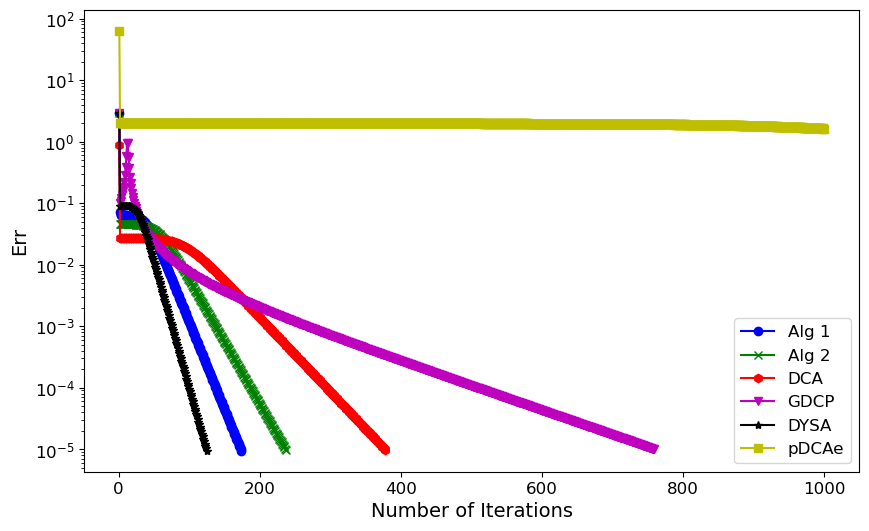

In [42]:
n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)
n6 = np.arange(1, len(err6)+1)

plt.figure(figsize=(10, 6))  # Increase plot size
plt.plot(n, err, 'o-b', label='Alg 1')
plt.plot(n2, err2, 'x-g', label='Alg 2')
plt.plot(n3, err3, 'h-r', label='DCA')
plt.plot(n4, err4, 'v-m', label='GDCP')
plt.plot(n5, err5, '*-k', label='DYSA')
plt.plot(n6, err6, 's-y', label='pDCAe')

plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Err', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.yscale('log')  # Set y-axis to log scale
plt.savefig('example2c1.eps', format='eps')
plt.show()

Time taken by Alg 1: 0.17830967903137207
Iterations by Alg 1: 161
Time taken by Alg 2: 0.19989776611328125
Iterations by Alg 2: 218
Time taken by DCA: 0.36108875274658203
Iterations by DCA: 345
Time taken by GDCP: 0.9746122360229492
Iterations by GDCP: 916
Time taken by DYSA: 0.18381690979003906
Iterations by DYSA: 114
Time taken by pDCAe: 1.034975290298462
Iterations by pDCAe: 1000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


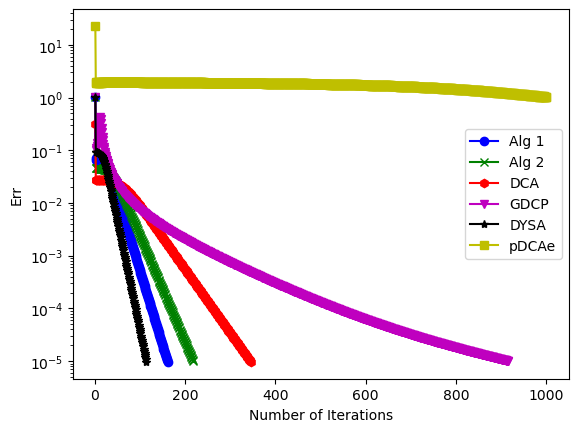

In [30]:
# Define the parameters
M = 200
N = 128
bet = 0.04
x0 = np.random.rand(N)
tol = 1e-5

# Call the Alg1 function
err, time_taken, iterations = Alg1(x0, bet, tol, M, N)
err2, time_taken2, iterations2 = Alg2(x0, bet, tol, M, N)
err3, time_taken3, iterations3 = DCA(x0, bet, tol, M, N)
err4, time_taken4, iterations4 = GDCP(x0, bet, tol, M, N)
err5, time_taken5, iterations5 = AlgDYSA(x0, bet, tol, M, N)
err6, time_taken6, iterations6 = pDCAe(x0, bet, tol, M, N)

# Print the results
#print("Error:", err)
print("Time taken by Alg 1:", time_taken)
print("Iterations by Alg 1:", iterations)
print("Time taken by Alg 2:", time_taken2)
print("Iterations by Alg 2:", iterations2)
print("Time taken by DCA:", time_taken3)
print("Iterations by DCA:", iterations3)
print("Time taken by GDCP:", time_taken4)
print("Iterations by GDCP:", iterations4)
print("Time taken by DYSA:", time_taken5)
print("Iterations by DYSA:", iterations5)
print("Time taken by pDCAe:", time_taken6)
print("Iterations by pDCAe:", iterations6)

n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)
n6 = np.arange(1, len(err6)+1)

plt.figure(figsize=(10, 6))  # Increase plot size
plt.plot(n, err, 'o-b', label='Alg 1')
plt.plot(n2, err2, 'x-g', label='Alg 2')
plt.plot(n3, err3, 'h-r', label='DCA')
plt.plot(n4, err4, 'v-m', label='GDCP')
plt.plot(n5, err5, '*-k', label='DYSA')
plt.plot(n6, err6, 's-y', label='pDCAe')

plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Err', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.yscale('log')  # Set y-axis to log scale
plt.savefig('example2c2.eps', format='eps')
plt.show()

Time taken by Alg 1: 1.4178595542907715
Iterations by Alg 1: 167
Time taken by Alg 2: 2.046509265899658
Iterations by Alg 2: 228
Time taken by DCA: 2.816574811935425
Iterations by DCA: 364
Time taken by GDCP: 5.75425386428833
Iterations by GDCP: 760
Time taken by DYSA: 0.8800687789916992
Iterations by DYSA: 121
Time taken by pDCAe: 7.108412504196167
Iterations by pDCAe: 1000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


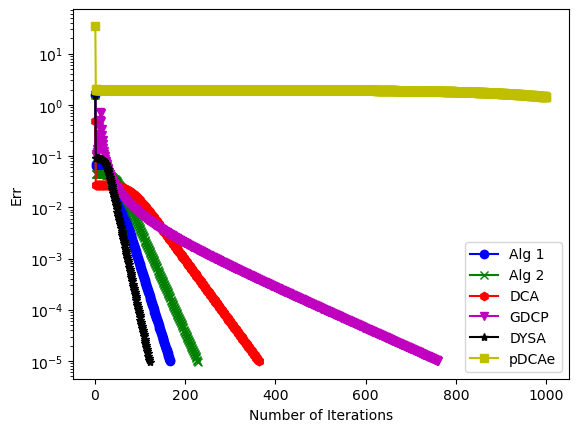

In [31]:
# Define the parameters
M = 521
N = 304
bet = 0.04
x0 = np.random.rand(N)
tol = 1e-5

# Call the Alg1 function
err, time_taken, iterations = Alg1(x0, bet, tol, M, N)
err2, time_taken2, iterations2 = Alg2(x0, bet, tol, M, N)
err3, time_taken3, iterations3 = DCA(x0, bet, tol, M, N)
err4, time_taken4, iterations4 = GDCP(x0, bet, tol, M, N)
err5, time_taken5, iterations5 = AlgDYSA(x0, bet, tol, M, N)
err6, time_taken6, iterations6 = pDCAe(x0, bet, tol, M, N)

# Print the results
#print("Error:", err)
print("Time taken by Alg 1:", time_taken)
print("Iterations by Alg 1:", iterations)
print("Time taken by Alg 2:", time_taken2)
print("Iterations by Alg 2:", iterations2)
print("Time taken by DCA:", time_taken3)
print("Iterations by DCA:", iterations3)
print("Time taken by GDCP:", time_taken4)
print("Iterations by GDCP:", iterations4)
print("Time taken by DYSA:", time_taken5)
print("Iterations by DYSA:", iterations5)
print("Time taken by pDCAe:", time_taken6)
print("Iterations by pDCAe:", iterations6)

n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)
n6 = np.arange(1, len(err6)+1)

plt.figure(figsize=(10, 6))  # Increase plot size
plt.plot(n, err, 'o-b', label='Alg 1')
plt.plot(n2, err2, 'x-g', label='Alg 2')
plt.plot(n3, err3, 'h-r', label='DCA')
plt.plot(n4, err4, 'v-m', label='GDCP')
plt.plot(n5, err5, '*-k', label='DYSA')
plt.plot(n6, err6, 's-y', label='pDCAe')

plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Err', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.yscale('log')  # Set y-axis to log scale
plt.savefig('example2c3.eps', format='eps')
plt.show()

Time taken by Alg 1: 8.732471942901611
Iterations by Alg 1: 168
Time taken by Alg 2: 11.71061086654663
Iterations by Alg 2: 229
Time taken by DCA: 16.140222787857056
Iterations by DCA: 365
Time taken by GDCP: 36.429810523986816
Iterations by GDCP: 763
Time taken by DYSA: 5.172584056854248
Iterations by DYSA: 119
Time taken by pDCAe: 44.02580761909485
Iterations by pDCAe: 1000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


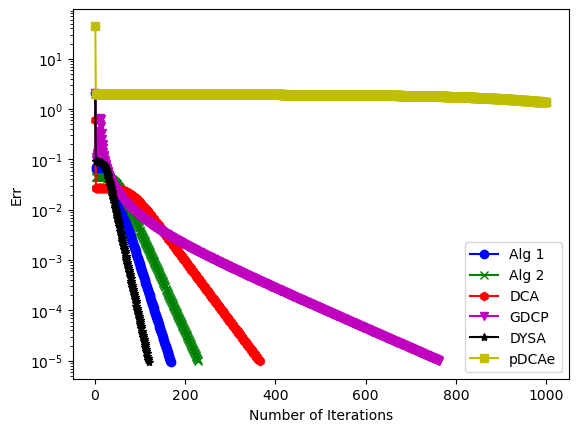

In [33]:
# Define the parameters
M = 700
N = 500
bet = 0.04
x0 = np.random.rand(N)
tol = 1e-5

# Call the Alg1 function
err, time_taken, iterations = Alg1(x0, bet, tol, M, N)
err2, time_taken2, iterations2 = Alg2(x0, bet, tol, M, N)
err3, time_taken3, iterations3 = DCA(x0, bet, tol, M, N)
err4, time_taken4, iterations4 = GDCP(x0, bet, tol, M, N)
err5, time_taken5, iterations5 = AlgDYSA(x0, bet, tol, M, N)
err6, time_taken6, iterations6 = pDCAe(x0, bet, tol, M, N)

# Print the results
#print("Error:", err)
print("Time taken by Alg 1:", time_taken)
print("Iterations by Alg 1:", iterations)
print("Time taken by Alg 2:", time_taken2)
print("Iterations by Alg 2:", iterations2)
print("Time taken by DCA:", time_taken3)
print("Iterations by DCA:", iterations3)
print("Time taken by GDCP:", time_taken4)
print("Iterations by GDCP:", iterations4)
print("Time taken by DYSA:", time_taken5)
print("Iterations by DYSA:", iterations5)
print("Time taken by pDCAe:", time_taken6)
print("Iterations by pDCAe:", iterations6)

n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)
n6 = np.arange(1, len(err6)+1)

plt.figure(figsize=(10, 6))  # Increase plot size
plt.plot(n, err, 'o-b', label='Alg 1')
plt.plot(n2, err2, 'x-g', label='Alg 2')
plt.plot(n3, err3, 'h-r', label='DCA')
plt.plot(n4, err4, 'v-m', label='GDCP')
plt.plot(n5, err5, '*-k', label='DYSA')
plt.plot(n6, err6, 's-y', label='pDCAe')

plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Err', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.yscale('log')  # Set y-axis to log scale
plt.savefig('example2c4.eps', format='eps')
plt.show()

Time taken by Alg 1: 16.920053243637085
Iterations by Alg 1: 171
Time taken by Alg 2: 22.99418878555298
Iterations by Alg 2: 231
Time taken by DCA: 32.5140917301178
Iterations by DCA: 372
Time taken by GDCP: 66.41081714630127
Iterations by GDCP: 760
Time taken by DYSA: 9.20355224609375
Iterations by DYSA: 123
Time taken by pDCAe: 70.30606651306152
Iterations by pDCAe: 1000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


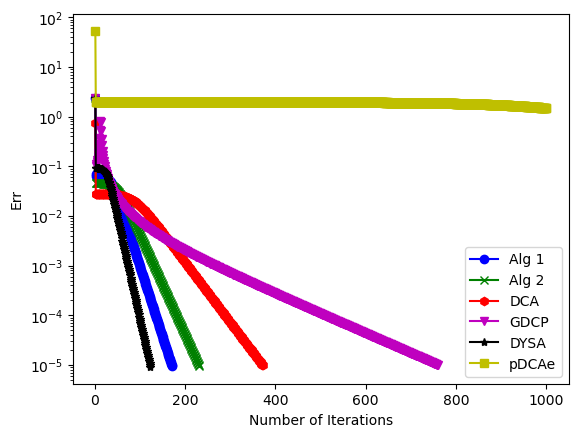

In [34]:
# Define the parameters
M = 1000
N = 700
bet = 0.04
x0 = np.random.rand(N)
tol = 1e-5

# Call the Alg1 function
err, time_taken, iterations = Alg1(x0, bet, tol, M, N)
err2, time_taken2, iterations2 = Alg2(x0, bet, tol, M, N)
err3, time_taken3, iterations3 = DCA(x0, bet, tol, M, N)
err4, time_taken4, iterations4 = GDCP(x0, bet, tol, M, N)
err5, time_taken5, iterations5 = AlgDYSA(x0, bet, tol, M, N)
err6, time_taken6, iterations6 = pDCAe(x0, bet, tol, M, N)

# Print the results
#print("Error:", err)
print("Time taken by Alg 1:", time_taken)
print("Iterations by Alg 1:", iterations)
print("Time taken by Alg 2:", time_taken2)
print("Iterations by Alg 2:", iterations2)
print("Time taken by DCA:", time_taken3)
print("Iterations by DCA:", iterations3)
print("Time taken by GDCP:", time_taken4)
print("Iterations by GDCP:", iterations4)
print("Time taken by DYSA:", time_taken5)
print("Iterations by DYSA:", iterations5)
print("Time taken by pDCAe:", time_taken6)
print("Iterations by pDCAe:", iterations6)

n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)
n6 = np.arange(1, len(err6)+1)

plt.figure(figsize=(10, 6))  # Increase plot size
plt.plot(n, err, 'o-b', label='Alg 1')
plt.plot(n2, err2, 'x-g', label='Alg 2')
plt.plot(n3, err3, 'h-r', label='DCA')
plt.plot(n4, err4, 'v-m', label='GDCP')
plt.plot(n5, err5, '*-k', label='DYSA')
plt.plot(n6, err6, 's-y', label='pDCAe')

plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Err', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.yscale('log')  # Set y-axis to log scale
plt.savefig('example2c5.eps', format='eps')
plt.show()

In [40]:
# Define the parameters
M = 1500
N = 1000
bet = 0.04
x0 = np.random.rand(N)
tol = 1e-5

# Call the Alg1 function
err, time_taken, iterations = Alg1(x0, bet, tol, M, N)
err2, time_taken2, iterations2 = Alg2(x0, bet, tol, M, N)
err3, time_taken3, iterations3 = DCA(x0, bet, tol, M, N)
err4, time_taken4, iterations4 = GDCP(x0, bet, tol, M, N)
err5, time_taken5, iterations5 = AlgDYSA(x0, bet, tol, M, N)
err6, time_taken6, iterations6 = pDCAe(x0, bet, tol, M, N)

# Print the results
#print("Error:", err)
print("Time taken by Alg 1:", time_taken)
print("Iterations by Alg 1:", iterations)
print("Time taken by Alg 2:", time_taken2)
print("Iterations by Alg 2:", iterations2)
print("Time taken by DCA:", time_taken3)
print("Iterations by DCA:", iterations3)
print("Time taken by GDCP:", time_taken4)
print("Iterations by GDCP:", iterations4)
print("Time taken by DYSA:", time_taken5)
print("Iterations by DYSA:", iterations5)
print("Time taken by pDCAe:", time_taken6)
print("Iterations by pDCAe:", iterations6)

n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)
n6 = np.arange(1, len(err6)+1)

plt.figure(figsize=(10, 6))  # Increase plot size
plt.plot(n, err, 'o-b', label='Alg 1')
plt.plot(n2, err2, 'x-g', label='Alg 2')
plt.plot(n3, err3, 'h-r', label='DCA')
plt.plot(n4, err4, 'v-m', label='GDCP')
plt.plot(n5, err5, '*-k', label='DYSA')
plt.plot(n6, err6, 's-y', label='pDCAe')

plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Err', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.yscale('log')  # Set y-axis to log scale
plt.savefig('example2c6.eps', format='eps')
plt.show()

KeyboardInterrupt: 